sr: 16000 , audio shape: (30392,)
length: 1.8995 secs


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


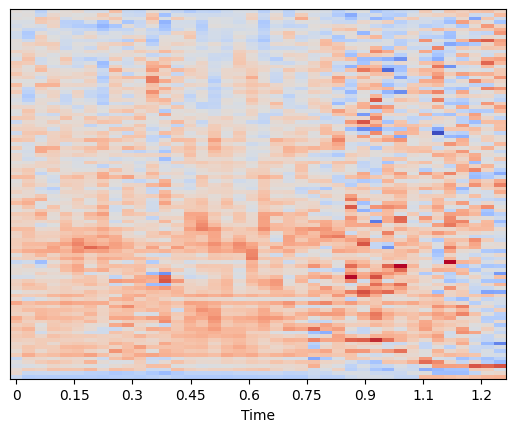

In [10]:
#MFCC
import librosa
file = '0.wav'
audio, sr = librosa.load(file, sr=16000)
print('sr:', sr, ', audio shape:', audio.shape)
print('length:', audio.shape[0]/float(sr), 'secs')
mfcc = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=100, n_fft=400, hop_length=160)

import sklearn.preprocessing

mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = pad2d(mfcc, 40)
librosa.display.specshow(padded_mfcc, sr=16000, x_axis='time')

In [11]:
#Mel spectogram

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.025
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S

Wav length: 1.8995, Mel_S shape:(40, 190)


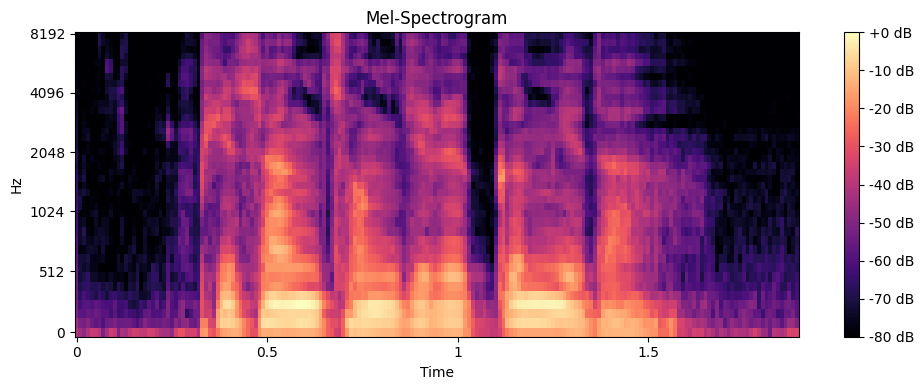

numpy.ndarray

In [12]:
man_original_data = '0.wav'
mel_spec = Mel_S(man_original_data)



type(padded_mfcc)